In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from lifelines import KaplanMeierFitter

In [2]:
df = pd.read_csv("../data/processed/kaggle_cancer_patients_processed.csv")

In [3]:
df.describe().loc[['min', 'mean', 'max']].transpose()

,min,mean,max
Age,20.00,54.353906,89.00
Genetic_Risk,0.00,5.011165,10.00
Air_Pollution,0.00,4.999724,10.00
Alcohol_Use,0.00,5.020130,10.00
Smoking,0.00,5.004249,10.00
Obesity_Level,0.00,4.978704,10.00
Cancer_Stage,0.00,1.997774,4.00
Treatment_Cost_USD,5000.05,52599.109773,99999.84


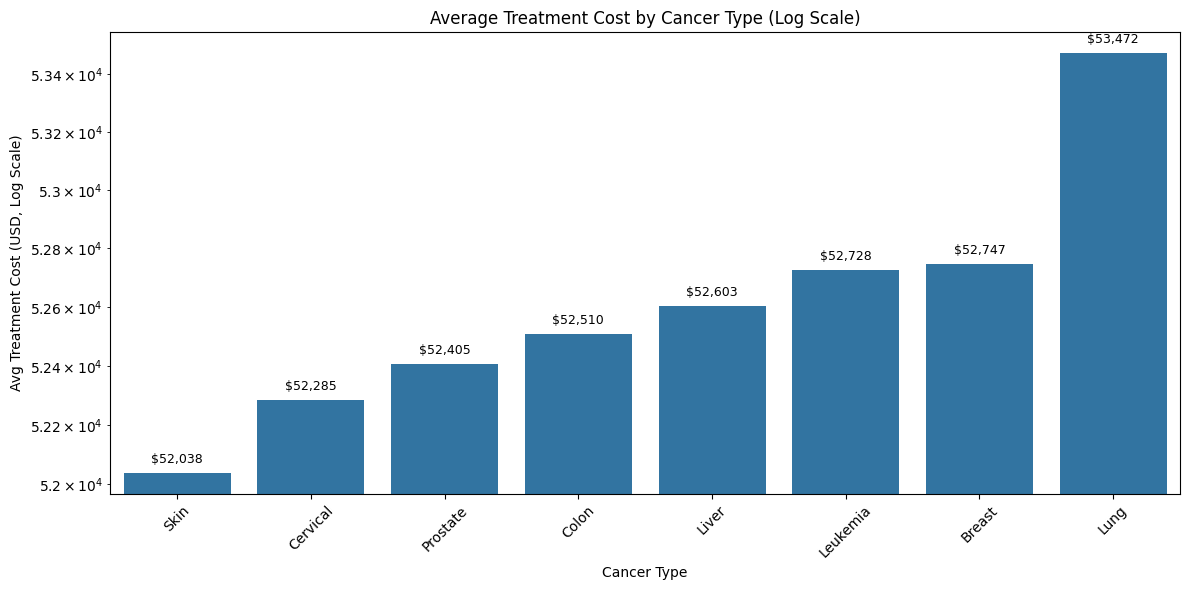

In [4]:
avg_cost_by_cancer = df.groupby('Cancer_Type')['Treatment_Cost_USD'].mean().sort_values()

# Plot 2: Average Treatment Cost by Cancer Type (Log Scale) with adjusted labels
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=avg_cost_by_cancer.index, y=avg_cost_by_cancer.values)
plt.yscale('log')
plt.title('Average Treatment Cost by Cancer Type (Log Scale)')
plt.ylabel('Avg Treatment Cost (USD, Log Scale)')
plt.xlabel('Cancer Type')
plt.xticks(rotation=45)

# Add annotations just above each bar
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f"${height:,.0f}",
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),  # Offset: 5 points above bar
                textcoords="offset points",
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

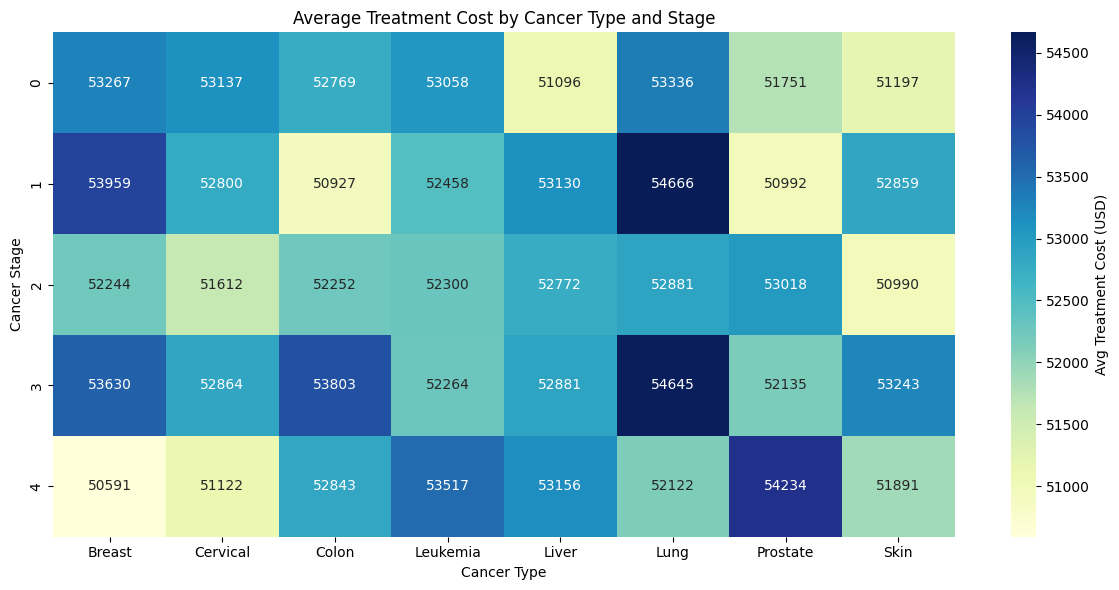

In [5]:
# 2. Cross comparison: Cancer Stage vs Cancer Type (grouped means)
pivot_stage_type = df.pivot_table(values='Treatment_Cost_USD',
                                  index='Cancer_Stage',
                                  columns='Cancer_Type',
                                  aggfunc='mean')

# 3. Heatmap: average cost by cancer type and stage
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_stage_type, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Avg Treatment Cost (USD)'})
plt.title('Average Treatment Cost by Cancer Type and Stage')
plt.xlabel('Cancer Type')
plt.ylabel('Cancer Stage')
plt.tight_layout()
plt.show()

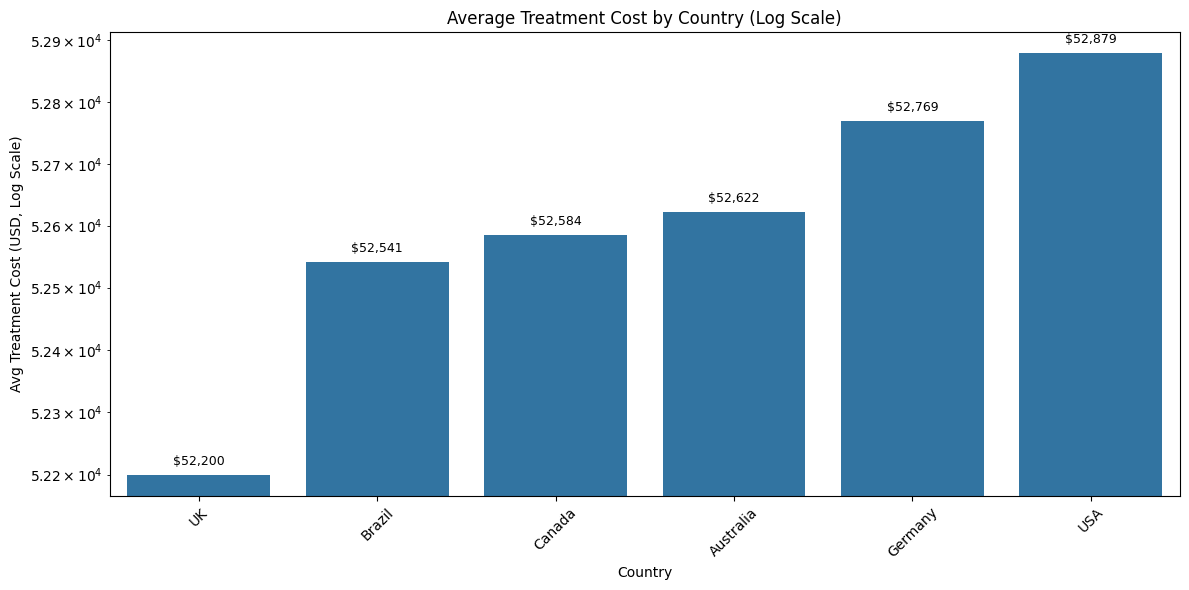

In [6]:
avg_cost_by_country = df.groupby('Country_Region')['Treatment_Cost_USD'].mean().sort_values()

# Plot 1: Average Treatment Cost by Country (Log Scale) with adjusted labels
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=avg_cost_by_country.index, y=avg_cost_by_country.values)
plt.yscale('log')
plt.title('Average Treatment Cost by Country (Log Scale)')
plt.ylabel('Avg Treatment Cost (USD, Log Scale)')
plt.xlabel('Country')
plt.xticks(rotation=45)

# Add annotations just above each bar
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f"${height:,.0f}",
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),  # Offset: 5 points above bar
                textcoords="offset points",
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

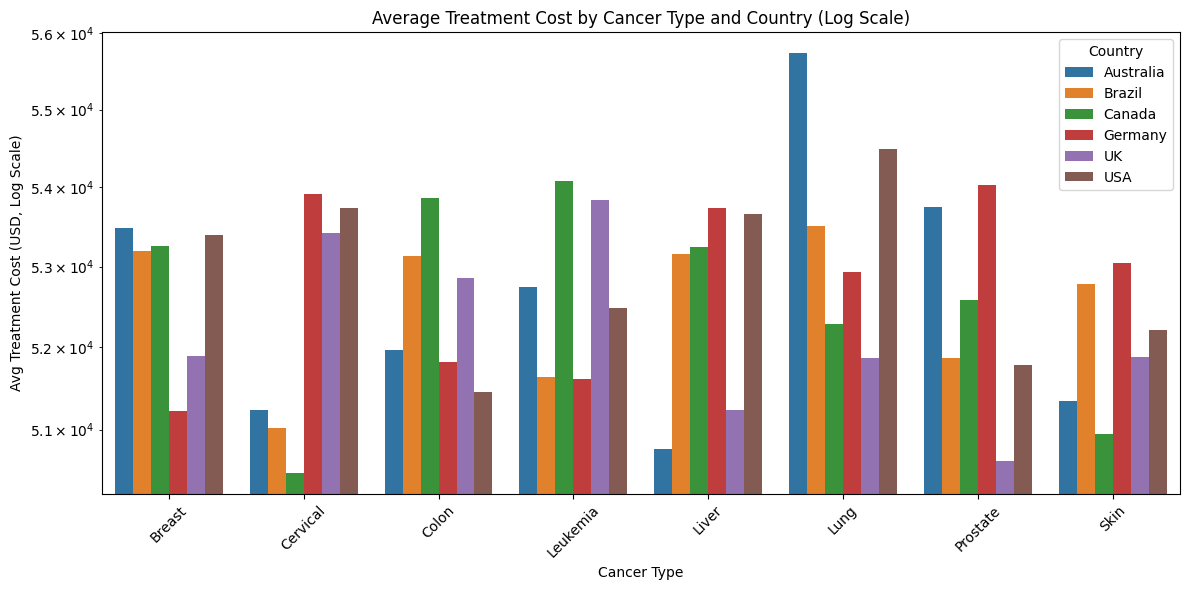

In [7]:
avg_cost_by_type_and_country = df.groupby(['Country_Region', 'Cancer_Type'])['Treatment_Cost_USD'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=avg_cost_by_type_and_country,
    x='Cancer_Type',
    y='Treatment_Cost_USD',
    hue='Country_Region'
)
plt.yscale('log')
plt.title('Average Treatment Cost by Cancer Type and Country (Log Scale)')
plt.ylabel('Avg Treatment Cost (USD, Log Scale)')
plt.xlabel('Cancer Type')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.tight_layout()
plt.show()

In [8]:
# Create a matrix (table) of average costs by cancer type and country
pivot = avg_cost_by_type_and_country.pivot(index='Country_Region', columns='Cancer_Type', values='Treatment_Cost_USD')

# Function to format: bold the highest value in each column
def highlight_max(s):
    is_max = s == s.max()
    return ['font-weight: bold' if v else '' for v in is_max]

# Display the matrix with the highest value in each cancer type in bold
pivot.style.format('${:,.0f}').apply(highlight_max, axis=0)

Cancer_Type,Breast,Cervical,Colon,Leukemia,Liver,Lung,Prostate,Skin
Country_Region,,,,,,,,
Australia,"$53,484","$51,238","$51,972","$52,744","$50,767","$55,735","$53,750","$51,348"
Brazil,"$53,198","$51,017","$53,137","$51,642","$53,153","$53,505","$51,876","$52,787"
Canada,"$53,262","$50,487","$53,868","$54,086","$53,242","$52,285","$52,587","$50,944"
Germany,"$51,229","$53,915","$51,821","$51,614","$53,737","$52,930","$54,026","$53,041"
UK,"$51,895","$53,426","$52,855","$53,842","$51,234","$51,867","$50,626","$51,879"
USA,"$53,395","$53,744","$51,449","$52,483","$53,665","$54,491","$51,786","$52,217"
